<a href="https://colab.research.google.com/github/Jasmine-kaur8/Flight-Price-Prediction-Project/blob/main/Flight_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
from google.colab import files
uploaded = files.upload()

Saving Flight_ticket_train.xlsx to Flight_ticket_train (2).xlsx


Importing the train data

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score, mean_squared_error

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.linear_model import  Ridge

import warnings
warnings.filterwarnings('ignore')

Importing required libraries

In [111]:
data = pd.read_excel('Flight_ticket_train.xlsx')
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


Reading the data

In [112]:
from google.colab import files
uploaded = files.upload()

Saving Flight_ticket(test_data).xlsx to Flight_ticket(test_data) (2).xlsx


Importing the test data

In [113]:
test_data = pd.read_excel('Flight_ticket(test_data).xlsx')
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


Reading the test data

In [191]:
data.shape

(10683, 17)

The data has 10684 rows and 17 columns

In [115]:
test_data.shape

(2671, 10)

The test data has 2671 rows and 10 columns.

In [116]:
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

There is 1 null value in Route and 1 null value in Total_Stops

In [117]:
test_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

There is no null value in the test data

In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


All the features are of object data type and target value has integer values

In [119]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


All the features are of object datatype

In [120]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


There are outliers in the price column.

In [122]:
data['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

The most of the columns have no info as additional info.

In [123]:
#Feature Engineering on train data

data['Date']  = data['Date_of_Journey'].str.split('/').str[0]
data['Month'] = data['Date_of_Journey'].str.split('/').str[1]
data['Year']  = data['Date_of_Journey'].str.split('/').str[2]
data.drop(columns = 'Date_of_Journey', axis = 1, inplace = True)


data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


Spliting the data into three columns data, month and year.




In [170]:
#Feature Engineering on test data

test_data['Date']  = test_data['Date_of_Journey'].str.split('/').str[0]
test_data['Month'] = test_data['Date_of_Journey'].str.split('/').str[1]
test_data['Year']  = test_data['Date_of_Journey'].str.split('/').str[2]
test_data.drop(columns = 'Date_of_Journey', axis = 1, inplace = True)


test_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Date,Month,Year
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,06,2019
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,05,2019
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,05,2019
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,05,2019
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,06,2019


Spliting the test data into three columns data, month and year.


In [124]:
data['Arrival_Time'] = data['Arrival_Time'].str.split(' ').str[0]
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


The extra information present in the column of arrival time is deleted

In [171]:
test_data['Arrival_Time'] = test_data['Arrival_Time'].str.split(' ').str[0]
test_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Date,Month,Year
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25,10h 55m,1 stop,No info,6,06,2019
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,05,2019
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00,23h 45m,1 stop,In-flight meal not included,21,05,2019
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,05,2019
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45,2h 50m,non-stop,No info,24,06,2019


The extra information present in the column of arrival time in test data is deleted

In [125]:
data['Total_Stops'] = data['Total_Stops'].fillna('1 stop')

The null value in the column total_stops is filled with 1 stop

In [126]:
data['Total_Stops'] = data['Total_Stops'].replace('non-stop', '0 stop')

The non-stop value is replaced by 0 stop

In [172]:
test_data['Total_Stops'] = test_data['Total_Stops'].replace('non-stop', '0 stop')

The non-stop value is replaced by 0 stop in test data

In [127]:
data['stop'] = data['Total_Stops'].str.split(' ').str[0]
data.drop(columns = 'Total_Stops', axis = 1, inplace = True)

The stop word is deleted from the data

In [173]:
test_data['stop'] = test_data['Total_Stops'].str.split(' ').str[0]
test_data.drop(columns = 'Total_Stops', axis = 1, inplace = True)

The stop word is deleted from the test data

In [128]:
data['stop'] = data['stop'].astype(int)

The stop column is converted into integer data type.

In [174]:
test_data['stop'] = test_data['stop'].astype(int)

The stop column is converted into integer data type in the test data.

In [129]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Additional_Info,Price,Date,Month,Year,stop
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,No info,3897,24,03,2019,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,No info,7662,1,05,2019,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,No info,13882,9,06,2019,2
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,No info,6218,12,05,2019,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,No info,13302,01,03,2019,1


Reading the train data

In [130]:
data['Arrival_Hour']     = data['Arrival_Time'].str.split(':').str[0]
data['Arrival_Minute']   = data['Arrival_Time'].str.split(':').str[1]
data['Departure_Hour']   = data['Dep_Time'].str.split(':').str[0]
data['Departure_Minute'] = data['Dep_Time'].str.split(':').str[1]

spliting the arrival time and departure time into hours and minutes.

In [175]:
test_data['Arrival_Hour']     = test_data['Arrival_Time'].str.split(':').str[0]
test_data['Arrival_Minute']   = test_data['Arrival_Time'].str.split(':').str[1]
test_data['Departure_Hour']   = test_data['Dep_Time'].str.split(':').str[0]
test_data['Departure_Minute'] = test_data['Dep_Time'].str.split(':').str[1]

spliting the arrival time and departure time into hours and minutes in the test data. 

In [131]:
data['Arrival_Hour'] = data['Arrival_Hour'].astype(int)
data['Arrival_Minute'] = data['Arrival_Minute'].astype(int)
data['Departure_Hour'] = data['Departure_Hour'].astype(int)
data['Departure_Hour'] = data['Departure_Hour'].astype(int)


Converting the arrival time and departure time into integer data type

In [176]:
test_data['Arrival_Hour'] = test_data['Arrival_Hour'].astype(int)
test_data['Arrival_Minute'] = test_data['Arrival_Minute'].astype(int)
test_data['Departure_Hour'] = test_data['Departure_Hour'].astype(int)
test_data['Departure_Hour'] = test_data['Departure_Hour'].astype(int)

Converting the arrival time and departure time into integer data type in the test data

In [132]:
data.drop(columns = ['Arrival_Time','Dep_Time'],axis=1, inplace = True)

Droping the arribal time and departure time from the data

In [177]:
test_data.drop(columns = ['Arrival_Time','Dep_Time'],axis=1, inplace = True)

Droping the arribal time and departure time from the test data

In [133]:
data['Route_1'] = data['Route'].str.split('→ ').str[0]
data['Route_2'] = data['Route'].str.split('→ ').str[1]
data['Route_3'] = data['Route'].str.split('→ ').str[2]
data['Route_4'] = data['Route'].str.split('→ ').str[3]
data['Route_5'] = data['Route'].str.split('→ ').str[4]
data['Route_6'] = data['Route'].str.split('→ ').str[5]

Spliting the route into different columns

In [178]:
test_data['Route_1'] = test_data['Route'].str.split('→ ').str[0]
test_data['Route_2'] = test_data['Route'].str.split('→ ').str[1]
test_data['Route_3'] = test_data['Route'].str.split('→ ').str[2]
test_data['Route_4'] = test_data['Route'].str.split('→ ').str[3]
test_data['Route_5'] = test_data['Route'].str.split('→ ').str[4]
test_data['Route_6'] = test_data['Route'].str.split('→ ').str[5]

Spliting the route into different columns from the test data

In [134]:
data.head()

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,Date,Month,Year,stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,No info,3897,24,03,2019,0,1,10,22,20,BLR,DEL,NaN,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,No info,7662,1,05,2019,2,13,15,5,50,CCU,IXR,BBI,BLR,NaN,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,No info,13882,9,06,2019,2,4,25,9,25,DEL,LKO,BOM,COK,NaN,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,No info,6218,12,05,2019,1,23,30,18,05,CCU,NAG,BLR,NaN,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,No info,13302,01,03,2019,1,21,35,16,50,BLR,NAG,DEL,NaN,NaN,NaN


Reading the data after all the manipulation

In [135]:
data['Route_1'].fillna('None',inplace=True)
data['Route_2'].fillna('None',inplace=True)
data['Route_3'].fillna('None',inplace=True)
data['Route_4'].fillna('None',inplace=True)
data['Route_5'].fillna('None',inplace=True)
data['Route_6'].fillna('None',inplace=True)

Replacing the null value with NONE in the route columns

In [179]:
test_data['Route_1'].fillna('None',inplace=True)
test_data['Route_2'].fillna('None',inplace=True)
test_data['Route_3'].fillna('None',inplace=True)
test_data['Route_4'].fillna('None',inplace=True)
test_data['Route_5'].fillna('None',inplace=True)
test_data['Route_6'].fillna('None',inplace=True)

Replacing the null value with NONE in the route columns in the test data

In [136]:
data.drop(columns = ['Duration','Route'],axis=1, inplace = True)

Dropped the column duration and route

In [180]:
test_data.drop(columns = ['Duration','Route'],axis=1, inplace = True)

Dropped the column duration and route from the test data

In [138]:
data['Price'].fillna(data['Price'].mean(),inplace=True)

Filling the null value in the price column with the mean value.

In [139]:
data.isna().sum()

Airline             0
Source              0
Destination         0
Additional_Info     0
Price               0
Date                0
Month               0
Year                0
stop                0
Arrival_Hour        0
Arrival_Minute      0
Departure_Hour      0
Departure_Minute    0
Route_1             0
Route_2             0
Route_3             0
Route_4             0
Route_5             0
Route_6             0
dtype: int64

There is no null value in the train data

In [181]:
test_data.isna().sum()

Airline             0
Source              0
Destination         0
Additional_Info     0
Date                0
Month               0
Year                0
stop                0
Arrival_Hour        0
Arrival_Minute      0
Departure_Hour      0
Departure_Minute    0
Route_1             0
Route_2             0
Route_3             0
Route_4             0
Route_5             0
Route_6             0
dtype: int64

There is no null value in test value

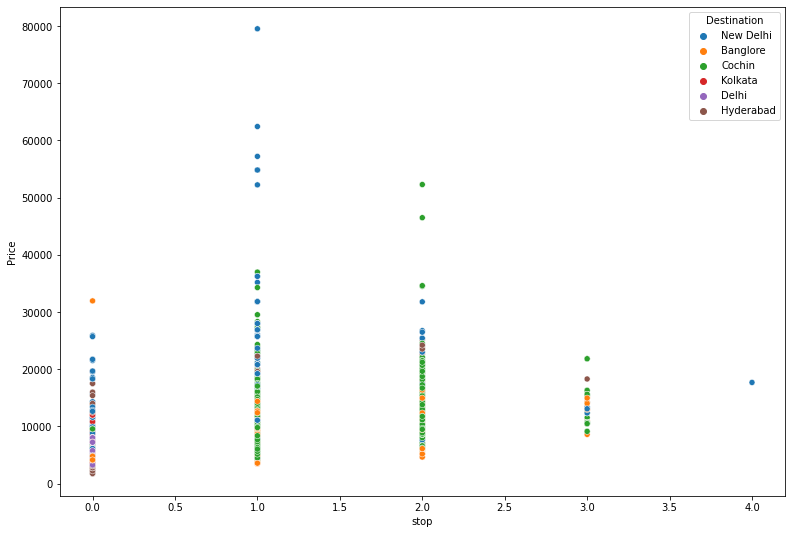

In [140]:
fig,axes=plt.subplots(1,1,figsize=(13,9))
sns.scatterplot(x='stop',y='Price',hue='Destination',data=data)

The new delhi has the highest price comparatively. Cochin has comparitively less price.

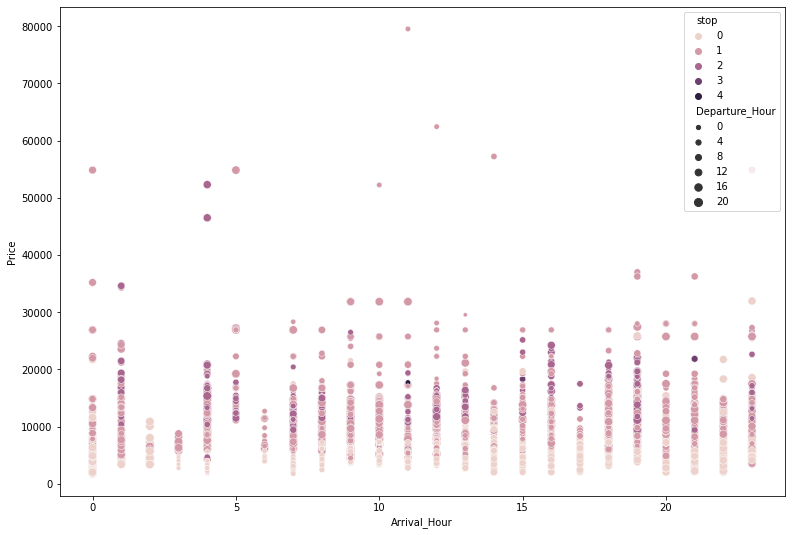

In [141]:
fig,axes=plt.subplots(1,1,figsize=(13,9))
sns.scatterplot(x='Arrival_Hour',y='Price',hue='stop',size='Departure_Hour',data=data)

Flights with 0 stop has low price, flights with 1 stop has comparatively higher price, as the number of stops increases the prices are more likely to increase.

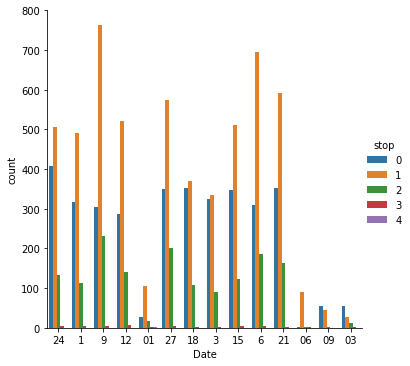

In [142]:
sns.factorplot('Date',data = data,hue ='stop' ,kind='count')


The highest frequency is of flights with 1 stop and then of 0 stop and then of 3 flights 

In [143]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

Inporting label encoder

In [144]:
data['Airline']=le.fit_transform(data['Airline'])
data['Source']=le.fit_transform(data['Source'])
data['Destination']=le.fit_transform(data['Destination'])
data['Additional_Info']=le.fit_transform(data['Additional_Info'])
data['Date']=le.fit_transform(data['Date'])
data['Month']=le.fit_transform(data['Month'])
data['Year']=le.fit_transform(data['Year'])
data['Departure_Minute']=le.fit_transform(data['Departure_Minute'])
data['Route_1']=le.fit_transform(data['Route_1'])
data['Route_2']=le.fit_transform(data['Route_2'])
data['Route_3']=le.fit_transform(data['Route_3'])
data['Route_4']=le.fit_transform(data['Route_4'])
data['Route_5']=le.fit_transform(data['Route_5'])
data['Route_6']=le.fit_transform(data['Route_6'])

Applying the label encoder to convert the caategorical value into the numerical value

In [182]:
test_data['Airline']=le.fit_transform(test_data['Airline'])
test_data['Source']=le.fit_transform(test_data['Source'])
test_data['Destination']=le.fit_transform(test_data['Destination'])
test_data['Additional_Info']=le.fit_transform(test_data['Additional_Info'])
test_data['Date']=le.fit_transform(test_data['Date'])
test_data['Month']=le.fit_transform(test_data['Month'])
test_data['Year']=le.fit_transform(test_data['Year'])
test_data['Departure_Minute']=le.fit_transform(test_data['Departure_Minute'])
test_data['Route_1']=le.fit_transform(test_data['Route_1'])
test_data['Route_2']=le.fit_transform(test_data['Route_2'])
test_data['Route_3']=le.fit_transform(test_data['Route_3'])
test_data['Route_4']=le.fit_transform(test_data['Route_4'])
test_data['Route_5']=le.fit_transform(test_data['Route_5'])
test_data['Route_6']=le.fit_transform(test_data['Route_6'])

Applying the label encoder to convert the caategorical value into the numerical value in the test data

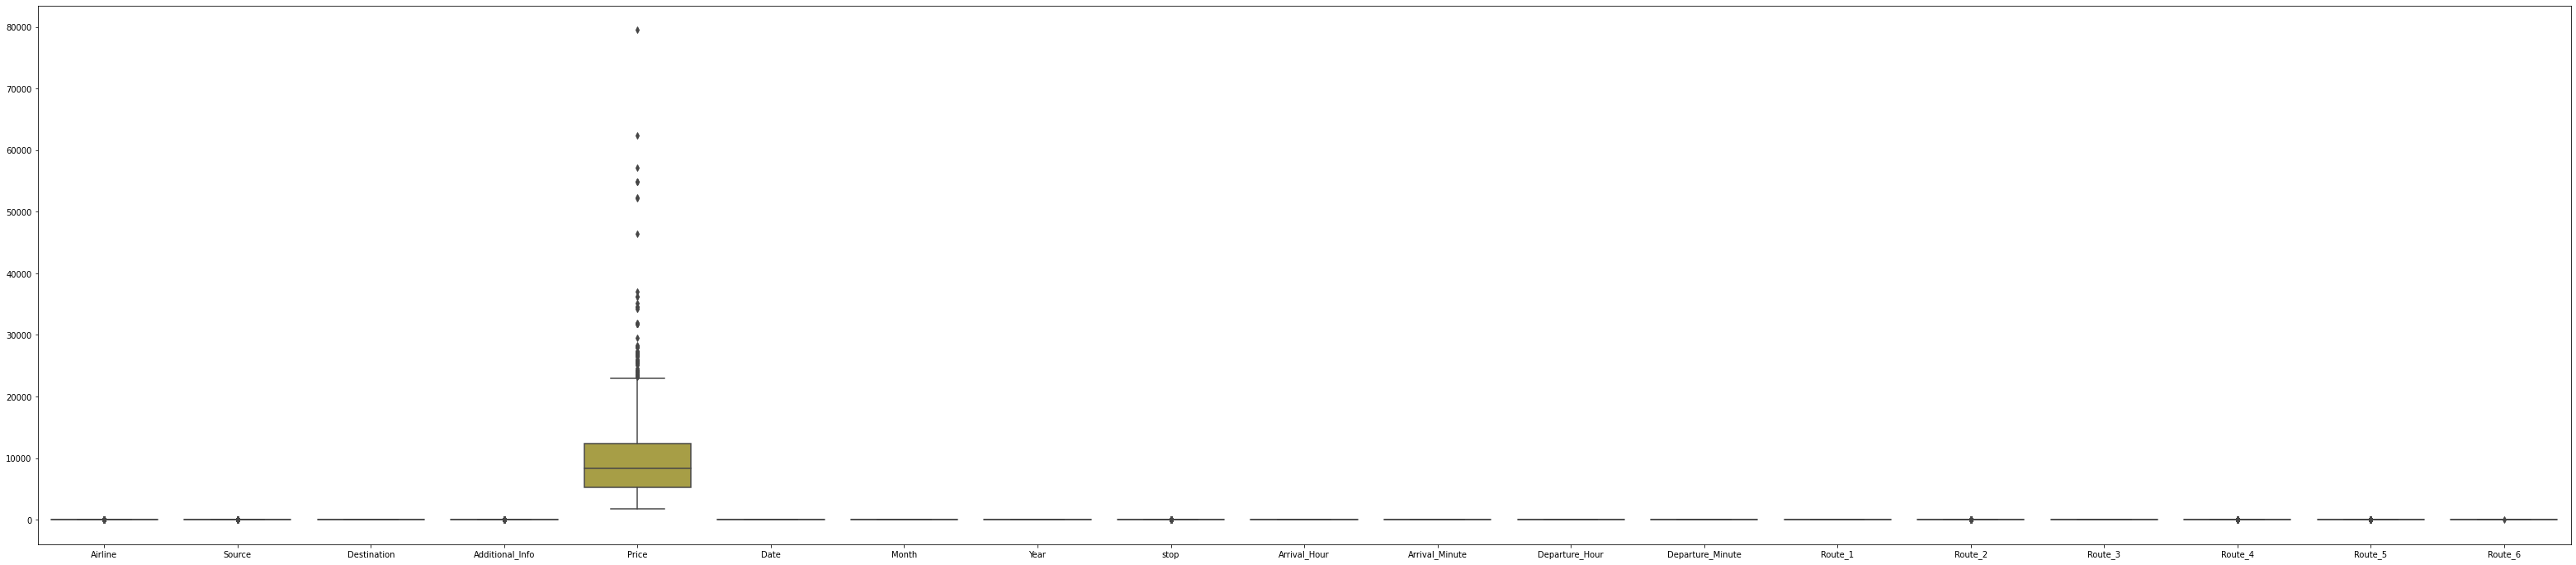

In [145]:
fig, ax = plt.subplots(1, 1, figsize=(55, 12))
sns.boxplot(data = data, ax=ax)
plt.show()

The price column has outliers

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe20ca85950>,
      dtype=object)

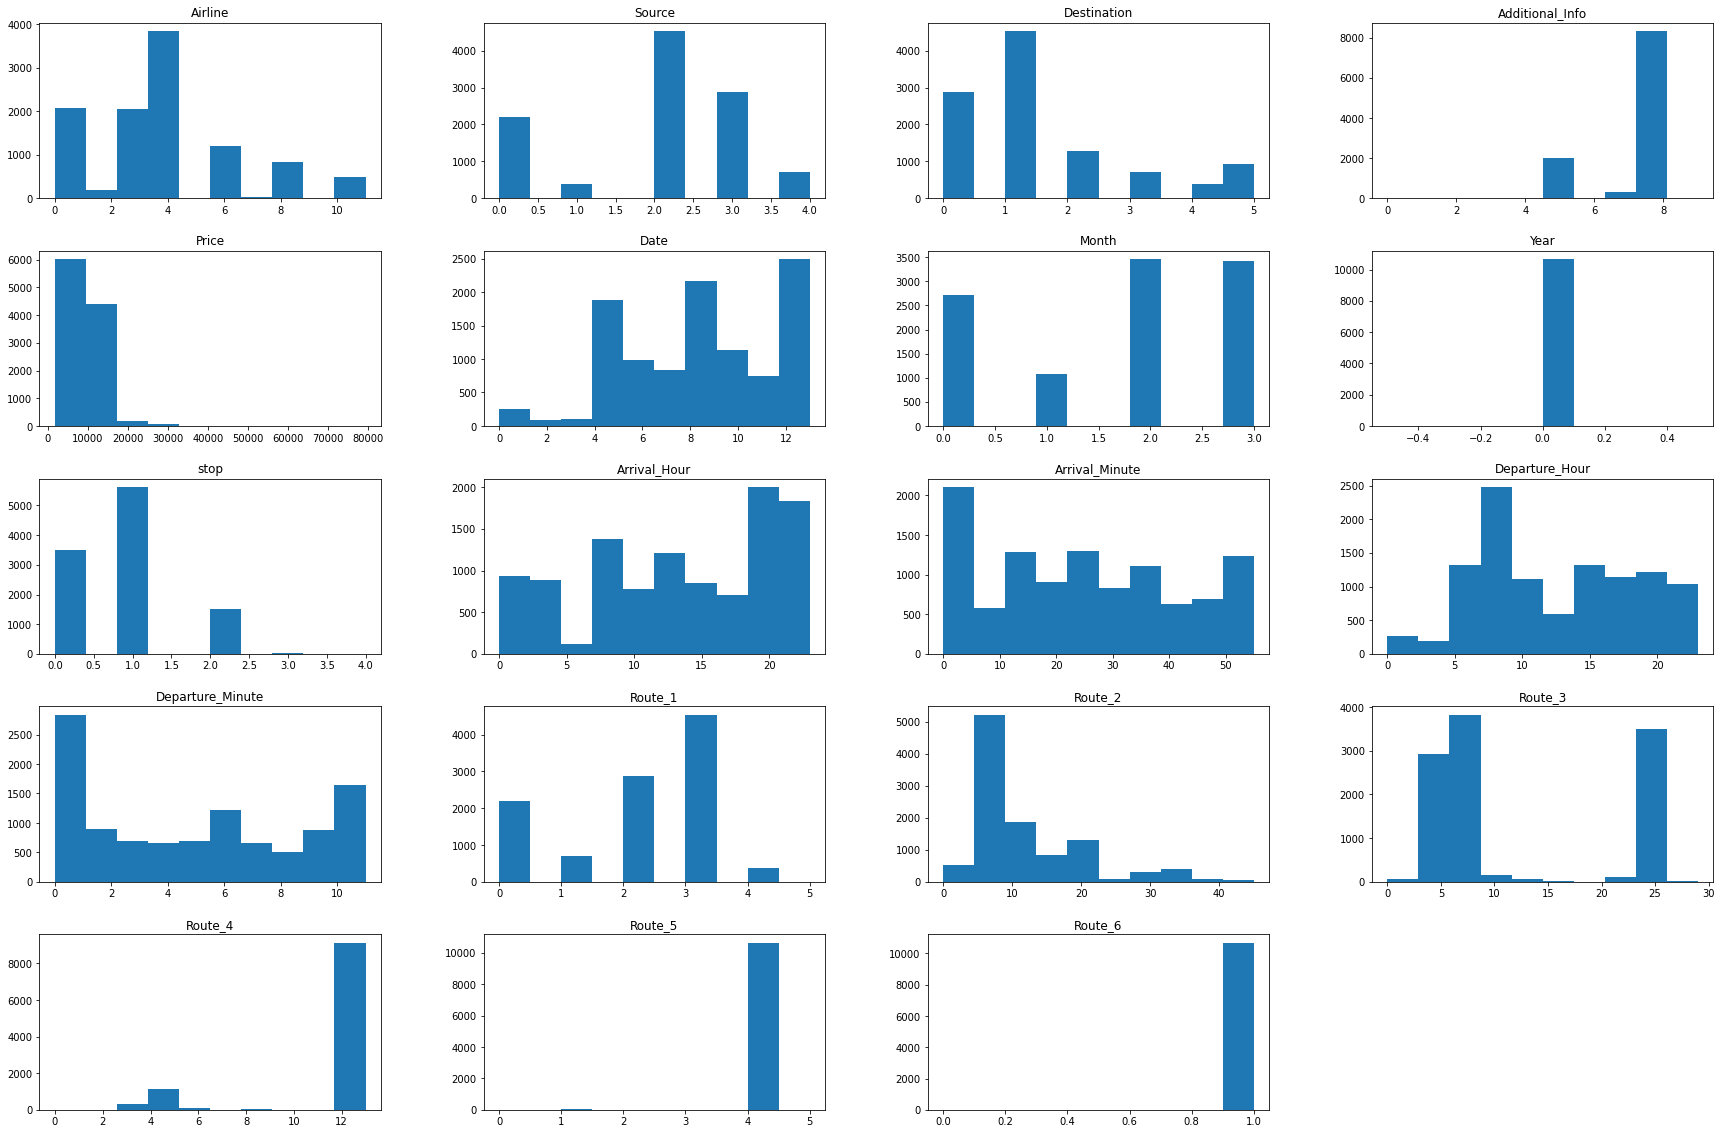

In [146]:
data.hist(figsize = (30,20), grid = False)

There is skewed data 

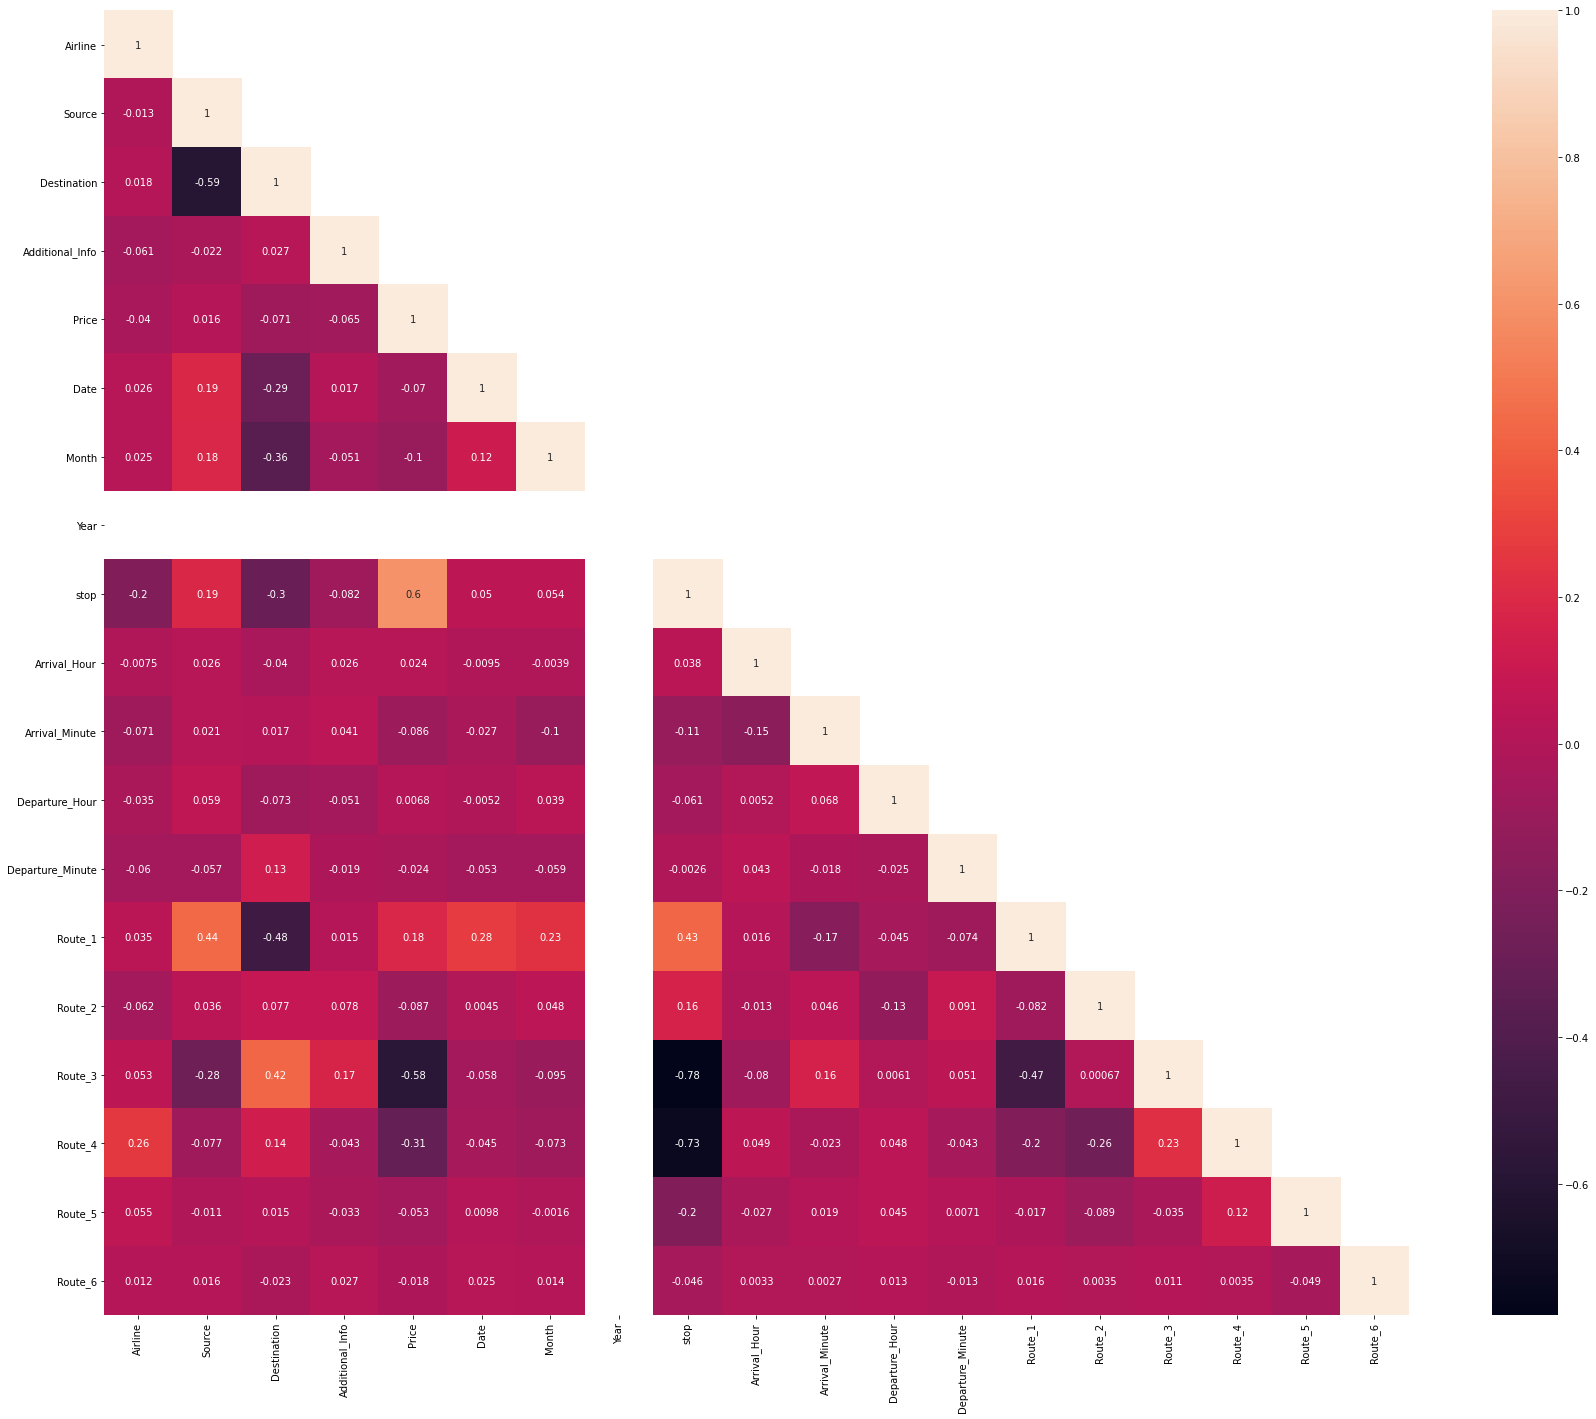

In [147]:
#Correlation Matrix

corr_mat = data.corr()
m = np.array(corr_mat)
m[np.tril_indices_from(m)] = False

fig = plt.gcf()
fig.set_size_inches(30,24)
sns.heatmap(data = corr_mat, mask = m, square = True, annot = True, cbar = True)

There does not seem to have strong correlation of between two features 

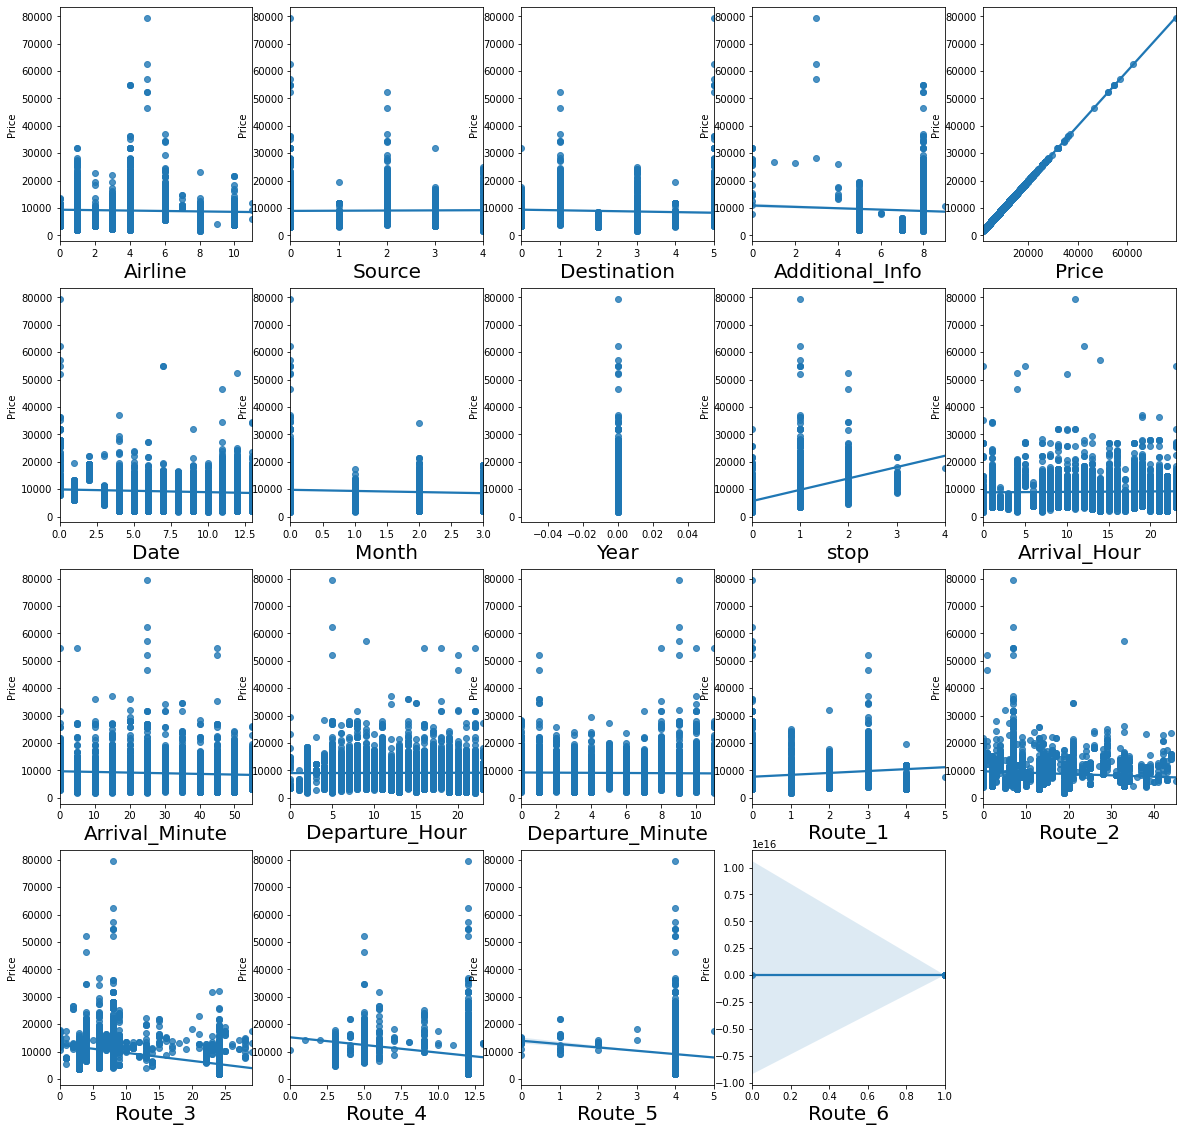

In [148]:
plt.figure(figsize = (20,25))
graph = 1

for column in data:
  if graph<=25:
    ax = plt.subplot(5,5,graph)
    sns.regplot(x = data[column], y = 'Price', data = data)
    plt.xlabel(column, fontsize = 20)
  graph+=1
plt.show()

The regression plot shows that stop and price has strong relationship. Any other variable do not have very strong relationship with the price

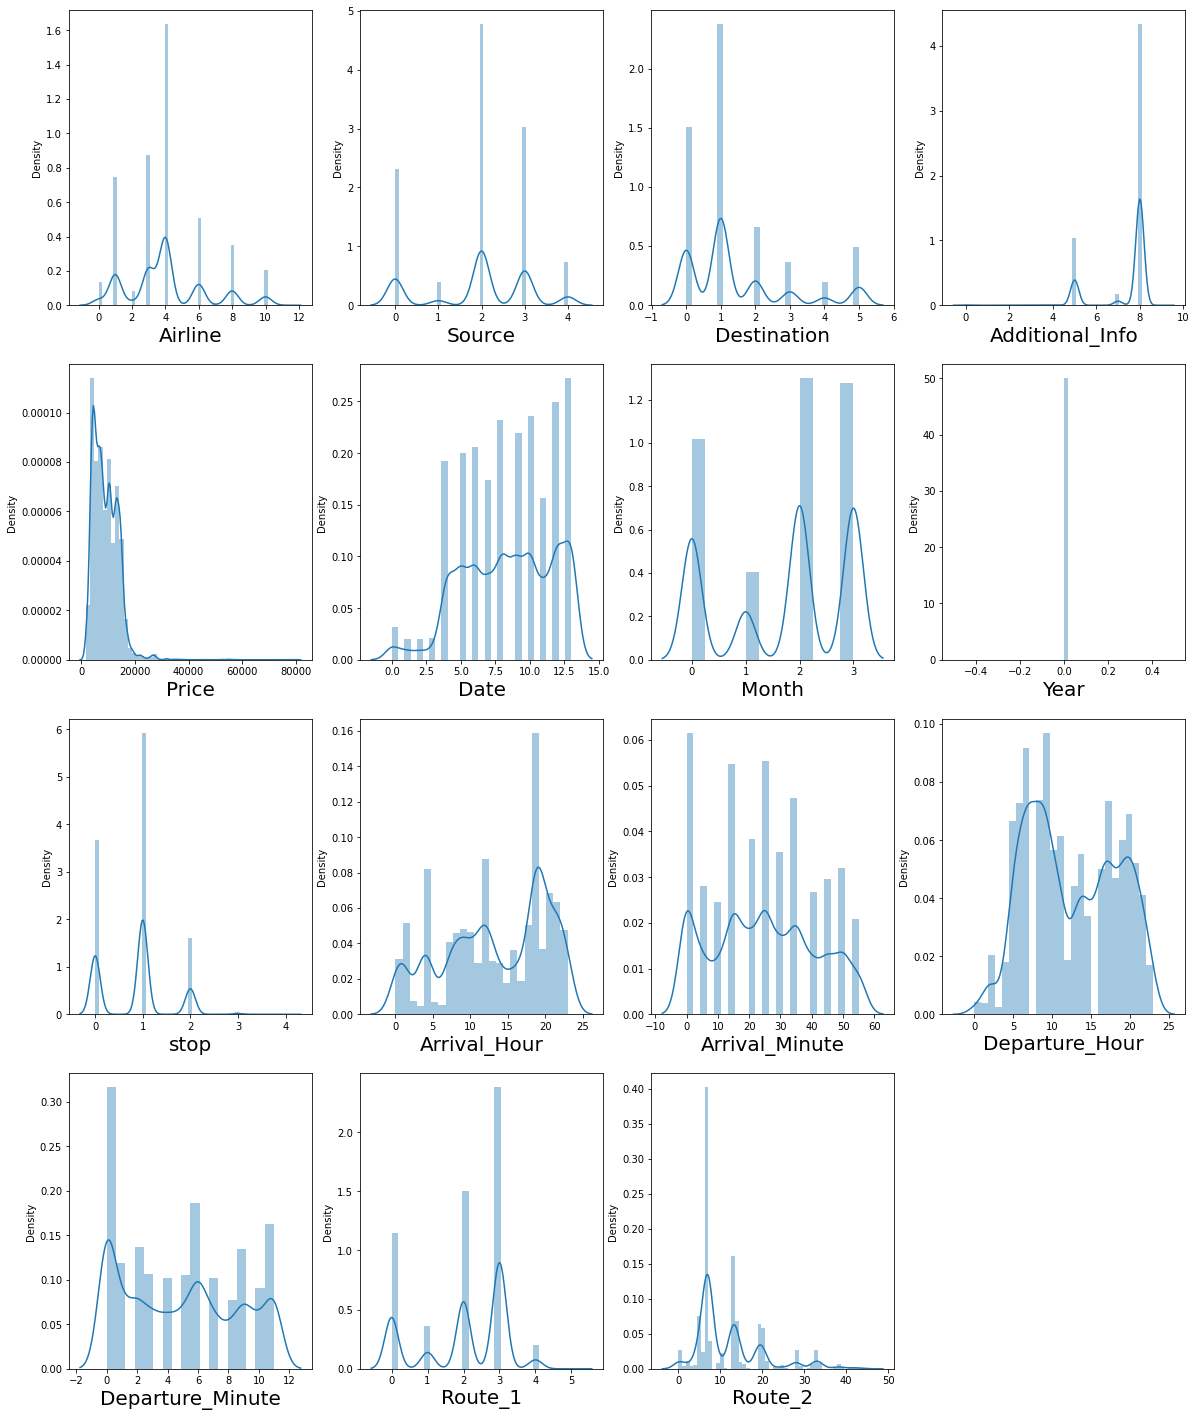

In [149]:
plt.figure(figsize = (20,25))
graph = 1

for column in data:
  if graph<=15:
    ax = plt.subplot(4,4,graph)
    sns.distplot(data[column])
    plt.xlabel(column, fontsize = 20)
  graph+=1
plt.show()

There is high skewness in the data

In [150]:
#Treating the outliers (train data)

# findingout the quantile of data 

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
# REMOVING OUTLIERS USING IQR METHOD
data_new = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
print("shape before and after")
print("shape before".ljust(20),":", data.shape)
print("shape after".ljust(20),":", data_new.shape)
print("Percentage Loss".ljust(20),":", (data.shape[0]-data_new.shape[0])/data.shape[0])   

shape before and after
shape before         : (10683, 19)
shape after          : (2552, 19)
Percentage Loss      : 0.7611157914443508


76% of the data is lost so it is not right to apply IQR

In [184]:
#Treating the outliers (test data)

# findingout the quantile of data 

Q1 = test_data.quantile(0.25)
Q3 = test_data.quantile(0.75)
IQR = Q3 - Q1
# REMOVING OUTLIERS USING IQR METHOD
data_new1 = test_data[~((test_data < (Q1 - 1.5 * IQR)) |(test_data > (Q3 + 1.5 * IQR))).any(axis=1)]
print("shape before and after")
print("shape before".ljust(20),":", data.shape)
print("shape after".ljust(20),":", data_new1.shape)
print("Percentage Loss".ljust(20),":", (data.shape[0]-data_new1.shape[0])/data.shape[0])   

shape before and after
shape before         : (10683, 17)
shape after          : (1302, 18)
Percentage Loss      : 0.8781241224375176


87% of the data is lost so it is not right to apply IQR in the test data.

In [151]:
#Applying z score
from scipy.stats import zscore
z = np.abs(zscore(data))

data1 = data[(z<3).all(axis = 1)]

Applying z score

In [152]:
print("shape before and after")
print("shape before".ljust(20),":", data.shape)
print("shape after".ljust(20),":", data1.shape)
print("Percentage Loss".ljust(20),":", (data.shape[0]-data1.shape[0])/data.shape[0])   

shape before and after
shape before         : (10683, 19)
shape after          : (0, 19)
Percentage Loss      : 1.0


100% of the data is lost, so can't apply z score

In [153]:
scalar = StandardScaler()
x_scaled = scalar.fit_transform(data)

Applying standard scaler

In [154]:
import statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

x_scaled.shape[1]
vif = pd.DataFrame()

vif['Features'] = data.columns
vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

vif

,Features,vif
0,Airline,1.113649
1,Source,1.681032
2,Destination,2.293852
3,Additional_Info,1.076301
4,Price,1.914621
5,Date,1.153623
6,Month,1.249129
7,Year,NaN
8,stop,24.919885
9,Arrival_Hour,1.044637


VIF is not very high for any feature except route 5 and route 6, thus droping these columns

In [155]:
data.drop(columns = 'Route_6',axis = 1, inplace = True)

deteled the route 6 in the train data

In [185]:
test_data.drop(columns = 'Route_6',axis = 1, inplace = True)

deteled the route 6 in the test data

In [156]:
data.drop(columns = 'Route_5',axis = 1, inplace = True)

deteled the route 6 in the train data

In [187]:
test_data.drop(columns = 'Route_5',axis = 1, inplace = True)

deteled the route 5 in the test data

In [157]:
#Model Building

X = data.drop('Price', axis = 1)
Y = data['Price']

Spliting the data into the dependent variable and the independent variable.

In [158]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.20, random_state=30)


models = [LinearRegression(), RandomForestRegressor(),
          KNeighborsRegressor(n_neighbors = 4), GradientBoostingRegressor()]
model_names = ['LR','RF', 'KNN','GB']

r2 = []
mse = []

for model in range(len(models)):
    clf = models[model]
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    r2.append(r2_score(y_test,pred))
    mse.append(mean_squared_error(y_test,pred))
    

models = {'Modelling Algorithm': model_names, 'r2 score': r2, 'MSE' : mse}
models_df = pd.DataFrame(models)
models_df

,Modelling Algorithm,r2 score,MSE
0,LR,0.470635,1.135757e+07
1,RF,0.891259,2.333045e+06
2,KNN,0.712642,6.165293e+06
3,GB,0.814347,3.983193e+06


r2 score of all the models after applying train test split

In [159]:
#cross validation 

from sklearn.model_selection import KFold, cross_val_score,GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.20, random_state=30)

models = [LinearRegression(), RandomForestRegressor(),
          KNeighborsRegressor(n_neighbors = 4), GradientBoostingRegressor()]
model_names = ['LR','RF', 'KNN','GB']


k_f = KFold(n_splits = 4, shuffle = True)
k_f

CV_S = []

for model in range(len(models)):
    clf = models[model]
    c = clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    CV_S.append(cross_val_score(c, X, Y, cv = 5).mean())
    

CV = {'Modelling Algorithm': model_names, 'CV SCORE': CV_S}
CV_df = pd.DataFrame(CV)
CV_df

,Modelling Algorithm,CV SCORE
0,LR,0.474356
1,RF,0.885686
2,KNN,0.707142
3,GB,0.818712


The cross validation of all the models

In [160]:
#Comparing CV Score and the r2 score:

Comparison = pd.DataFrame({})
Comparison['Modelling Algorithm'] =  model_names
Comparison['r2 score'] = r2
Comparison['CV SCORE'] = CV_S
Comparison['Difference'] = [r2[0] - CV_S[0], r2[1] - CV_S[1], r2[2] - CV_S[2], r2[3] - CV_S[3]]
Comparison

,Modelling Algorithm,r2 score,CV SCORE,Difference
0,LR,0.470635,0.474356,-0.003720
1,RF,0.891259,0.885686,0.005573
2,KNN,0.712642,0.707142,0.005500
3,GB,0.814347,0.818712,-0.004364


The difference between the r2 score and the cv score is minimum for the model KNN. 

In [162]:
#HYPERPARAMETER TUNING:
from sklearn.model_selection import GridSearchCV

grid_param = {
    'n_neighbors' : range(2,10,2),
    'weights' : ['uniform', 'distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size' : range(20,40)
}

Applying hyperparameter tuning

In [163]:
grid = GridSearchCV(KNeighborsRegressor(), param_grid = grid_param)

applied grid search CV

In [164]:
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': range(20, 40),
                         'n_neighbors': range(2, 10, 2),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

Trained the model

In [165]:
best_parameters = grid.best_params_
print(best_parameters)

{'algorithm': 'ball_tree', 'leaf_size': 20, 'n_neighbors': 4, 'weights': 'distance'}


Got the best parameter

In [168]:
#FINAL MODEL
#Substituting the best parameters in the  GradientBoostingRegressor:

knn =  KNeighborsRegressor(algorithm = 'ball_tree', leaf_size = 20, n_neighbors = 4, weights = 'distance')

knn.fit(X_train, y_train)
pred = knn.predict(X_test)
rscore = r2_score(y_test, pred)
rscore

0.7705284143928983

Received the r2 score as 77% after applying hyperparameter tuning

In [189]:
# predicting on actual test data

X_t = test_data
y_result = knn.predict(X_t)

Predicting the data using the test data 

In [190]:
pd.Series(y_result)

0       11406.715204
1        4226.000000
2       11468.216402
3        9492.585313
4        3658.964960
            ...     
2666    10354.638424
2667     5550.089979
2668     9847.533535
2669    10580.225148
2670     7768.289179
Length: 2671, dtype: float64

Received the y value of the test data.